# Reinforcement Learning - SARSA with Function Approximation


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import time

discount=1.00
alpha=0.01

                           
#-----------------------------------------------------------

# For Frozen Lake we use a 1-hot representation
#  of the discrete space which is equivalent to the tabular case

def prepFrozen(map_name=None):
    np.random.seed(5467)
    env = gym.make('FrozenLake-v1',desc=None,map_name=map_name)
    nA=env.nA
    nS=env.nS
    env.seed(48304)
    return(env,nS,nA)
    
def frozenPhi8(s):
    a=np.zeros(64)
    a[s]=1.0
    return(a)

def prepFrozen8():
    dname="Frozen8"
    env,nS,nA=prepFrozen()
    mymaxsteps=1000
    env._max_episode_steps = mymaxsteps
    dim=64 
    return(env,dim,nA,frozenPhi8,dname)

def frozenPhi4(s):
    a=np.zeros(16)
    a[s]=1.0
    return(a)

def prepFrozen4():
    dname="Frozen4"
    env,nS,nA=prepFrozen(map_name='4x4')
    mymaxsteps=250
    env._max_episode_steps = mymaxsteps
    dim=16
    return(env,dim,nA,frozenPhi4,dname)

#-----------------------------------------------------------

# For cart pole we use the original features

# Actions:
#        Type: Discrete(2)
#        Num	Action
#        0	Push cart to the left
#        1	Push cart to the right

# Observation: 
#        Type: Box(4)
#        Num	Observation                 Min         Max
#        0	Cart Position             -4.8            4.8
#        1	Cart Velocity             -Inf            Inf
#        2	Pole Angle                 -24 deg        24 deg
#        3	Pole Velocity At Tip      -Inf            Inf

def identity(x):
    return x

        
def prepCartPole(map_name=None):
    np.random.seed(5467)
    env = gym.make('CartPole-v0')
    dname="CartPole"
    env.seed(48304)
    nA=2
    dim=np.shape(env.observation_space)[0] 
    mymaxsteps=500
    env._max_episode_steps = mymaxsteps
    return(env,dim,nA,identity,dname)

#-----------------------------------------------------------

# For the Lunar Lander we add some features
#  to make the linear representation more expressive

# LunarLander-v2 4 actions
# Nop, fire left engine, main engine, right engine
# self.action_space = spaces.Discrete(4)

# state
# (pos.x - VIEWPORT_W/SCALE/2) / (VIEWPORT_W/SCALE/2),
# (pos.y - (self.helipad_y+LEG_DOWN/SCALE)) / (VIEWPORT_H/SCALE/2),
# vel.x*(VIEWPORT_W/SCALE/2)/FPS,
# vel.y*(VIEWPORT_H/SCALE/2)/FPS,
# self.lander.angle,
# 20.0*self.lander.angularVelocity/FPS,
# 1.0 if self.legs[0].ground_contact else 0.0,
# 1.0 if self.legs[1].ground_contact else 0.0

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

def LunarPhi(s):
    x,y,vx,vy,a,va,ll,lr=s
    return(sigmoid(np.array([x,y,vx,vy,a,va,x*vx,y*vy,(100-y)*(100-x),a*va,ll,lr])))
    
def prepLunarLander(mymaxsteps=100):
    np.random.seed(5467)
    env = gym.make('LunarLander-v2')
    dname="LunarLander"
    env.seed(48304)
    dim=np.shape(env.observation_space)[0]+4
    nA=env.action_space.n
    print(dname,dim,nA)
    mymaxsteps=100
    env._max_episode_steps = mymaxsteps
    return(env,dim,nA,LunarPhi,dname)

#-----------------------------------------------------------

# stub for your code
# replace demo with sarsa

def getdecayfactor(numepisodes,lowepsilon=0.01,highepsilon=0.5):
    decayfactor=np.exp((np.log(lowepsilon/highepsilon)) / (0.8* numepisodes))
    return(decayfactor)

def demo(env,nS,nA,phi,dname,render=False):
    print("Demo environment ",dname)
    s = phi(env.reset())
    for t in range(env._max_episode_steps):
        if render:
            env.render()
        time.sleep(0.1)
        action = env.action_space.sample()
        s, reward, done, info = env.step(action)
        s2=phi(s)
        print("Phi(state) is ",s2)
        if done:
            break
    if render:
        env.close()

def demoenv(prepFunction,render=False):
    env,nS,nA,phi,dname=prepFunction()
    demo(env,nS,nA,phi,dname,render=render)


# run demo

print("decay factor",getdecayfactor(100000))

#demoenv(prepFrozen8,render=False)
demoenv(prepFrozen4,render=False)
time.sleep(2)

demoenv(prepCartPole,render=False)
time.sleep(2)

demoenv(prepLunarLander,render=False)


decay factor 0.9999511009080317
Demo environment  Frozen4
Phi(state) is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Phi(state) is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Phi(state) is  [0. 0. 0. 0. 0. 0

Phi(state) is  [0.48858772 0.78611784 0.50195243 0.38824556 0.40564024 0.38619377
 0.49991086 0.35620697 1.         0.5441359  0.5        0.5       ]
Phi(state) is  [0.48853772 0.78431844 0.50003397 0.38231148 0.40046447 0.39406849
 0.49999844 0.34992673 1.         0.54329524 0.5        0.5       ]
Phi(state) is  [0.48848813 0.78240691 0.50002842 0.37602582 0.39531096 0.39407178
 0.49999869 0.34341106 1.         0.54558929 0.5        0.5       ]
Phi(state) is  [0.48843895 0.78038129 0.50002258 0.36978173 0.39018078 0.39407506
 0.49999896 0.3371592  1.         0.54788118 0.5        0.5       ]
Phi(state) is  [0.48840926 0.77822822 0.50245017 0.36273667 0.3845176  0.38289254
 0.49988638 0.33017164 1.         0.55589654 0.5        0.5       ]
Phi(state) is  [0.48836675 0.77596399 0.50074606 0.35711633 0.37926407 0.3905205
 0.49996528 0.32511782 1.         0.55460658 0.5        0.5       ]
Phi(state) is  [0.48837857 0.77374609 0.50623587 0.3606717  0.37391916 0.3880926
 0.49971005 0.330953

# Packages that need to be installed

!pip install Box2D
!pip install box2d-py
!pip install gym[all]
!pip install gym[Box_2D]

# SARSA with Linear Approximation

In [8]:
#Function that gives the quality of the policy
def quality(env, w, phi, max_steps, episodes=500):
    success = 0
    hole = 0
    steps_list = []
    reward_final = 0
    
    #Run for multiple episodes to get the quality
    for episode in range(episodes):
        eps = env.reset()
        steps=0
        reward_final = 0
        #Break if the number of steps>max_steps
        while steps<max_steps:
            
            #Calculate Q using phi and w
            Q_as = np.dot(phi(eps).T, w)
            
            #Get the action by taking the argmax of Q, we pick random action if there is a tie
            a_1 = np.random.choice(np.flatnonzero(Q_as == Q_as.max()))
            eps, reward, done, other = env.step(a_1)
            steps +=1
            
            #Increment reward at each step to help us get cumulative reward
            reward_final +=reward
            
            #iterate until done is true
            if done and reward > 0:
                success += 1
                break
                
            #If reward is 0, we reached the hole
            elif done and reward == 0:
                hole += 1
                break
                
        #Append the result at the end of each episode
        steps_list.append(reward_final)
    env.close() 
    
    #Calculating the average reward across all 500 episodes
    avg_steps = np.mean(steps_list)

    return avg_steps


In [9]:
from statistics import mean, pstdev
#Function to get the quality
def policy_eval(w, env, phi, max_steps):
    success = quality(env, w,phi, max_steps, 500)
    return success


In [10]:
#Choose action based on epsilon greedy
import random
def take_action_prob(epsilon, s, w, phi):
    a = 0
    
    #Calculate Q using w and phi(s)
    Q = np.dot(phi(s).T,w)
    
    #Epsilon greedy
    if np.random.uniform(0,1) < epsilon:
        a = env.action_space.sample()
        
    #Choose a random action if there is a tie
    else:
        a = np.random.choice(np.flatnonzero(Q == Q.max()))
    return a

In [11]:
#Function to calculate the Q value from phi and w
def Q_value(w, s, a, phi):
    return np.dot(phi(s).T, w[:,a])

In [12]:
#SARSA with function approximation
def sarsa_func_approx(env, nS, nA, episodes, max_steps, gamma, epsilon, phi, mod, decay_factor, w, eps_end):
    quality_final = []
    steps_final = []

    #Iterate for all episodes
    for i in range(0,episodes+1):
        
        #Decide epsilon based on the episode number
        #Initial value of epsilon
        if i == 0:
            epsilon = epsilon
            
        #Make epsilon constant after 80% of the episode
        elif i >= 0.8 * episodes:
            epsilon = eps_end
            
        #Otherwise, decrease epsilon by the decay factor
        else:
            epsilon *= decay_factor
            
        s1 = env.reset()
        steps = 0
        
        #Choosing an action based on epsilon greedy
        a1 = take_action_prob(epsilon, s1, w, phi)
        reward1 = 0
        done = False
        
        #Iterate until done or max steps is reached
        while steps<max_steps:
    
            #Take a step based in the action obtained from epsilon greedy
            s2, reward, done, _ = env.step(a1)
            a2 = take_action_prob(epsilon, s2, w, phi)

            #Update Q value based on s1,s2
            Q1 = Q_value(w, s1, a1, phi)
            Q2 = Q_value(w, s2, a2, phi)
            
            #Update the weight array depending on if the episode is done or not
            if done:
                w[:,a1] += alpha*np.dot((reward - Q1), phi(s1))
                break
                
            w[:,a1] += alpha*np.dot((reward + gamma* Q2 - Q1),phi(s1))
            
            #Update the next state and action
            s1 = s2
            a1 = a2
            steps +=1
            
 
        #Get the quality every nth iteration
        if i%mod == 0:
            qual = policy_eval(w,env, phi, max_steps)
            quality_final.append(qual)
            print('Quality at iteration ', i, 'is ', qual)
            

    return quality_final


# Frozen Lake 4

In [15]:
#Initialize the variables
alpha = 0.01
gamma = 1
max_steps = 1000
episodes = 30000
mod = 1000
env,dim,nA,frozenPhi4,dname = prepFrozen4()
epsilon = 0.5
eps_end = 0.01
qual_final = []
decay_factor = getdecayfactor(episodes, eps_end, epsilon)

#Run Sarsa on frozenlake4
for j in np.arange(0,3):
    print(j)
    w = np.random.rand(dim, nA)
    s = sarsa_func_approx(env, dim, nA, episodes, max_steps, gamma, epsilon, frozenPhi4, mod, decay_factor, w, eps_end)
    qual_final.append(s)

0
Quality at iteration  0 is  0.0
Quality at iteration  1000 is  0.256
Quality at iteration  2000 is  0.262
Quality at iteration  3000 is  0.258
Quality at iteration  4000 is  0.698
Quality at iteration  5000 is  0.664
Quality at iteration  6000 is  0.638
Quality at iteration  7000 is  0.74
Quality at iteration  8000 is  0.668
Quality at iteration  9000 is  0.776
Quality at iteration  10000 is  0.786
Quality at iteration  11000 is  0.78
Quality at iteration  12000 is  0.79
Quality at iteration  13000 is  0.766
Quality at iteration  14000 is  0.762
Quality at iteration  15000 is  0.772
Quality at iteration  16000 is  0.796
Quality at iteration  17000 is  0.77
Quality at iteration  18000 is  0.776
Quality at iteration  19000 is  0.814
Quality at iteration  20000 is  0.774
Quality at iteration  21000 is  0.75
Quality at iteration  22000 is  0.788
Quality at iteration  23000 is  0.764
Quality at iteration  24000 is  0.778
Quality at iteration  25000 is  0.756
Quality at iteration  26000 is

In [16]:
#Get the mean and standard deviation of the quality
qual_mean_final = np.mean(qual_final, axis = 0)
qual_std_final = np.std(qual_final, axis = 0)


Text(0.5, 1.0, 'Frozen Lake Small - Quality vs. Episodes')

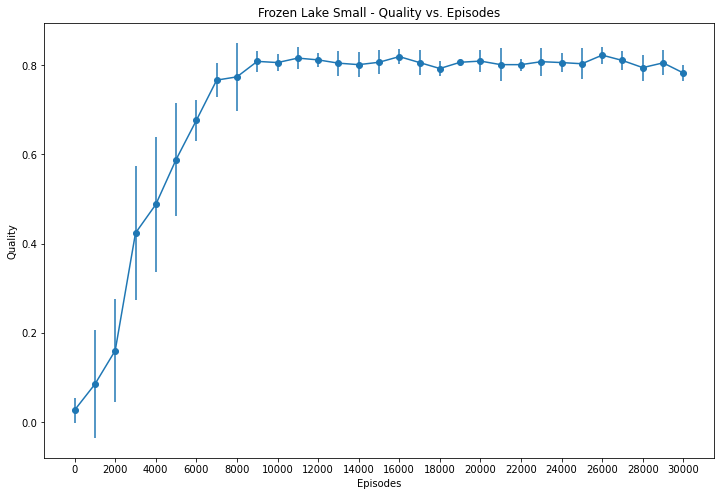

In [18]:
#Plot the graph
mod = 1000
x = np.arange(0,len(qual_mean_final) * mod, mod)
fig, ax = plt.subplots(figsize = (12,8))

ax.errorbar(x, qual_mean_final,yerr=qual_std_final,fmt = '-o')

ax.set_ylabel('Quality')
ax.set_xlabel('Episodes')
ax.set_xticks(np.arange(min(x), max(x)+1, mod*2))
ax.set_title('Frozen Lake Small - Quality vs. Episodes')

# Frozen Lake 8

In [24]:
#Initialize the variables
alpha = 0.01
gamma = 1
max_steps = 1000
episodes = 160000
mod = 5000
#Run Sarsa on frozenlake8
env,dim,nA,frozenPhi8,dname = prepFrozen8()
epsilon = 0.5
eps_end = 0.01
decay_factor = getdecayfactor(episodes, eps_end, epsilon)
qual_final = []

for j in np.arange(0,3):
    print(j)
    w = np.random.random((dim, nA))
    s2 = sarsa_func_approx(env, dim, nA, episodes, max_steps, gamma, epsilon, frozenPhi8, mod, decay_factor,w, eps_end)
    qual_final.append(s2)

0
Quality at iteration  0 is  0.0
Quality at iteration  5000 is  0.006
Quality at iteration  10000 is  0.0
Quality at iteration  15000 is  0.028
Quality at iteration  20000 is  0.024
Quality at iteration  25000 is  0.012
Quality at iteration  30000 is  0.098
Quality at iteration  35000 is  0.102
Quality at iteration  40000 is  0.174
Quality at iteration  45000 is  0.13
Quality at iteration  50000 is  0.26
Quality at iteration  55000 is  0.582
Quality at iteration  60000 is  0.588
Quality at iteration  65000 is  0.572
Quality at iteration  70000 is  0.592
Quality at iteration  75000 is  0.594
Quality at iteration  80000 is  0.576
Quality at iteration  85000 is  0.59
Quality at iteration  90000 is  0.65
Quality at iteration  95000 is  0.58
Quality at iteration  100000 is  0.58
Quality at iteration  105000 is  0.606
Quality at iteration  110000 is  0.62
Quality at iteration  115000 is  0.606
Quality at iteration  120000 is  0.604
Quality at iteration  125000 is  0.568
Quality at iteration

In [25]:
#Get the mean and standard deviation of the quality
qual_mean_final = np.mean(qual_final, axis = 0)
qual_std_final = np.std(qual_final, axis = 0)


Text(0.5, 1.0, 'Frozen Lake Big - Quality vs. Episodes')

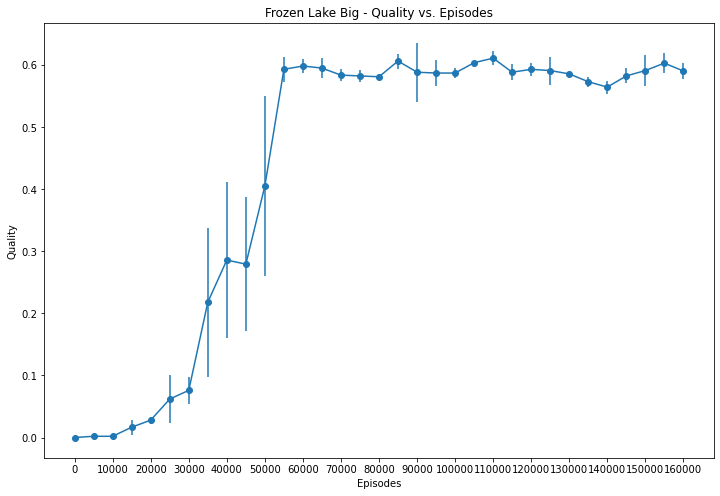

In [28]:
#Plot the graph
mod = 5000
x = np.arange(0,len(qual_mean_final) * mod, mod)
fig, ax = plt.subplots(figsize = (12,8))

ax.errorbar(x, qual_mean_final,yerr=qual_std_final,fmt = '-o')

ax.set_ylabel('Quality')
ax.set_xlabel('Episodes')
ax.set_xticks(np.arange(min(x), max(x)+1, mod*2))
ax.set_title('Frozen Lake Big - Quality vs. Episodes')

# Cart pole

In [21]:
#Initialize the variables
alpha = 0.01
gamma = 1
max_steps = 1000
episodes = 25000
mod = 500
#Run Sarsa on cartpole
env,dim,nA,identity,dname = prepCartPole()
epsilon = 0.5
qual_final = []
decay_factor = 0.998
eps_end = 0.05

for j in np.arange(0,5):
    print(j)
    w = np.random.randn(dim, nA)
    s3 = sarsa_func_approx(env, dim, nA, episodes, max_steps, gamma, epsilon, identity, mod, decay_factor,w, eps_end)
    qual_final.append(s3)

0
Quality at iteration  0 is  8.92
Quality at iteration  500 is  8.956
Quality at iteration  1000 is  9.142
Quality at iteration  1500 is  9.312
Quality at iteration  2000 is  9.49
Quality at iteration  2500 is  9.646
Quality at iteration  3000 is  9.718
Quality at iteration  3500 is  9.748
Quality at iteration  4000 is  9.768
Quality at iteration  4500 is  9.788
Quality at iteration  5000 is  9.81
Quality at iteration  5500 is  9.774
Quality at iteration  6000 is  9.802
Quality at iteration  6500 is  9.824
Quality at iteration  7000 is  9.804
Quality at iteration  7500 is  9.806
Quality at iteration  8000 is  9.762
Quality at iteration  8500 is  9.83
Quality at iteration  9000 is  9.782
Quality at iteration  9500 is  9.786
Quality at iteration  10000 is  9.832
Quality at iteration  10500 is  9.824
Quality at iteration  11000 is  9.806
Quality at iteration  11500 is  9.782
Quality at iteration  12000 is  9.816
Quality at iteration  12500 is  9.814
Quality at iteration  13000 is  9.856


Quality at iteration  7000 is  9.838
Quality at iteration  7500 is  9.814
Quality at iteration  8000 is  9.83
Quality at iteration  8500 is  9.846
Quality at iteration  9000 is  9.862
Quality at iteration  9500 is  9.84
Quality at iteration  10000 is  9.818
Quality at iteration  10500 is  9.872
Quality at iteration  11000 is  9.856
Quality at iteration  11500 is  9.832
Quality at iteration  12000 is  9.844
Quality at iteration  12500 is  9.838
Quality at iteration  13000 is  9.82
Quality at iteration  13500 is  9.854
Quality at iteration  14000 is  9.816
Quality at iteration  14500 is  9.844
Quality at iteration  15000 is  9.8
Quality at iteration  15500 is  9.79
Quality at iteration  16000 is  9.83
Quality at iteration  16500 is  9.864
Quality at iteration  17000 is  9.808
Quality at iteration  17500 is  9.83
Quality at iteration  18000 is  9.82
Quality at iteration  18500 is  9.87
Quality at iteration  19000 is  9.808
Quality at iteration  19500 is  9.856
Quality at iteration  20000 

In [27]:
#Get the mean and standard deviation of the quality
qual_mean_final = np.mean(qual_final, axis = 0)
qual_std_final = np.std(qual_final, axis = 0)


Text(0.5, 1.0, 'Cartpole - # of Steps vs. Episodes')

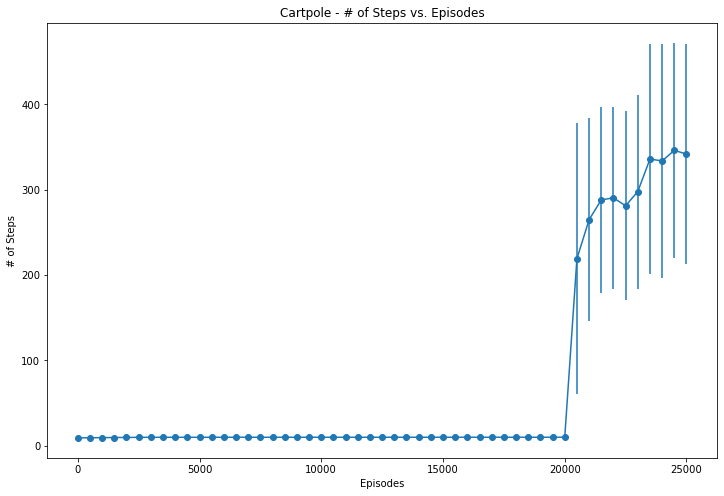

In [28]:
#Plot the graph 
mod = 500
x = np.arange(0,len(qual_mean_final) * mod, mod)
fig, ax = plt.subplots(figsize = (12,8))

ax.errorbar(x, qual_mean_final,yerr=qual_std_final,fmt = '-o')

ax.set_ylabel('# of Steps')
ax.set_xlabel('Episodes')
ax.set_xticks(np.arange(min(x), max(x)+1, mod*10))
ax.set_title('Cartpole - # of Steps vs. Episodes')

Text(0.5, 1.0, 'Iteration 5')

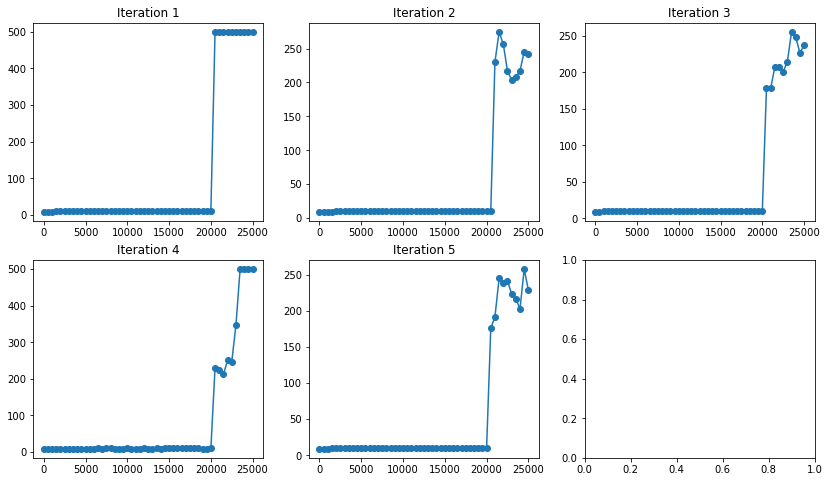

In [41]:
#Plots for individual iterations
fig, ax = plt.subplots(2, 3, figsize=(14,8))
x = np.arange(0,len(qual_final[0]) * mod, mod)
ax[0,0].plot(x, qual_final[0], 'o-')
ax[0,0].set_title('Iteration 1')
ax[0,1].plot(x, qual_final[1], 'o-')
ax[0,1].set_title('Iteration 2')
ax[0,2].plot(x, qual_final[2], 'o-')
ax[0,2].set_title('Iteration 3')
ax[1,0].plot(x, qual_final[3], 'o-')
ax[1,0].set_title('Iteration 4')
ax[1,1].plot(x, qual_final[4], 'o-')
ax[1,1].set_title('Iteration 5')

# Lunar Lander

In [ ]:
#Initialize the variables
alpha = 0.01
gamma = 1
max_steps = 100
episodes = 100000
mod = 2000

#Run Sarsa on Lunar Lander
env,dim,nA,LunarPhi,dname = prepLunarLander()
epsilon = 0.6
decay_factor = 0.998
eps_end = 0.01
qual_final = []
for j in np.arange(0,2):
    print(j)
    w = np.random.rand(dim, nA)
    s4 = sarsa_func_approx(env, dim, nA, episodes, max_steps, gamma, epsilon, LunarPhi, mod, decay_factor, w, eps_end)
    qual_final.append(s4)

LunarLander 12 4
0
Quality at iteration  0 is  -3874.916032505561
Quality at iteration  2000 is  -2457.9868547582646
Quality at iteration  4000 is  -2944.1177756215584


In [ ]:
#Get the mean and standard deviation of the quality
qual_mean_final = np.mean(qual_final, axis = 0)
qual_std_final = np.std(qual_final, axis = 0)


In [ ]:
#Plot the graph
mod = 2000
x = np.arange(0,len(qual_mean_final) * mod, mod)
fig, ax = plt.subplots(figsize = (12,8))

ax.errorbar(x, qual_mean_final,yerr=qual_std_final,fmt = '-o')

ax.set_ylabel('Avg Score')
ax.set_xlabel('Episodes')
ax.set_xticks(np.arange(min(x), max(x)+1, mod*4))
ax.set_title('Lunar Lander - Avg Score vs. Episodes')